## Beyond Linearity 2: Local Regression

We need to add some additional packages to make this work.

So start with *pip3 install ISLP*.  ISLP is a package from a book entitled 'Introduction to Statistical Learning with Python'.

We'll also need the *pygam* package.

Then *pip3 install pygam*

In [42]:
import numpy as np, pandas as pd
import pylab
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt

from ISLP import load_data
from ISLP.models import (summarize,
                         poly,
                         ModelSpec as MS)
from statsmodels.stats.anova import anova_lm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import PredictionErrorDisplay

from scipy.interpolate import interp1d

We are going to start with some data on wages.  We'll look at the data on **wages** with **age** as a predictor.

In [43]:
Wage = load_data('Wage')
y = Wage['wage']
age = Wage['age']
Wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


Scatterplot reminder of the Wage data

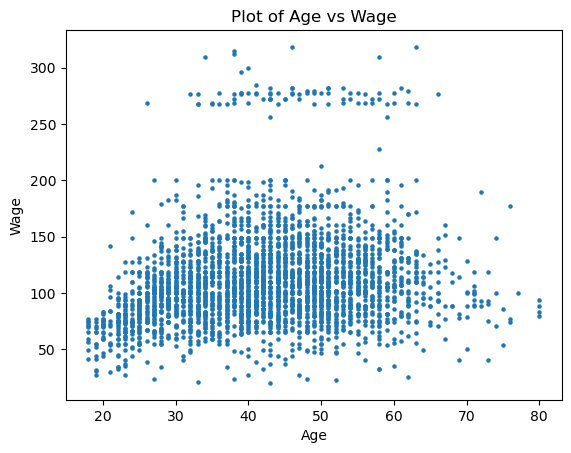

In [44]:
plt.scatter( Wage['age'],Wage['wage'], s=5)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Wage' )
plt.title('Plot of Age vs Wage')
plt.show()

### LOCAL REGRESSION

So the idea with local regression is that we create a window of data based upon our predictor(s) and we fit a linear regression in that window.
From that regression we get a predicted value.  We then slide the window slightly and refit a regression line, get a predicted value and repeat.
(Note that usually the points are weighted so that those close to the center of the window are counted more heavily than those on the edges of 
the window, because *leverage*).

This type of regression is usally called LOESS or LOWESS regression.  The former stands for locally estimated scatterplot smoothing while
the latter stands for locally weighted scatterplot smoothing.  

In [45]:
# the code here is for doing a lowess or local weighted scatterplot smoothing (LOWESS)
# also called local estimated scatterplot smoothing (LOESS)
# 
#  the python code below is 
# the exog variable is the predictor and exog is short for exogenous which is an econ term
# likewise, the endog variable is the response and endog is short for endogenous, another econ term

# the frac argument is the proportion of the data used to define a window.
# frac is something we can and will change as part of 
smoothed = sm.nonparametric.lowess(exog=age, endog=y, frac=0.4)


# convert smoothed from numpy array to pandas dataframe
# and drop any duplicate rows
# note there are duplicates because we evaluate the prediction
# at each value of our predictor, so 
smoothed=pd.DataFrame(smoothed).drop_duplicates()

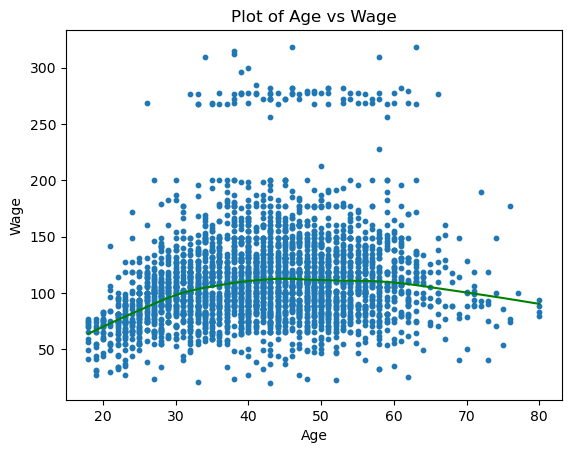

In [46]:
plt.scatter( age,y,s=10)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Wage' )
plt.title('Plot of Age vs Wage')

# Add prediction line to plot
plt.plot(smoothed.iloc[:,0], smoothed.iloc[:,1],color='green')

#plt.ylim([40,140])
plt.show()

The plot above is relatively smooth and similar to what we found using the spline data.  Next we will experiment with 
the *frac* argument to see how it changes the prediction curve.

In [47]:
# create loess regression with windows of 0.1, 0.2, 0.6 and 0.8
# 
smoothed1 = sm.nonparametric.lowess(exog=age, endog=y, frac=0.1)
smoothed1=pd.DataFrame(smoothed1).drop_duplicates()

smoothed2 = sm.nonparametric.lowess(exog=age,endog=y, frac = 0.2)
smoothed2=pd.DataFrame(smoothed2).drop_duplicates()

smoothed3 = sm.nonparametric.lowess(exog=age, endog=y, frac=0.6)
smoothed3=pd.DataFrame(smoothed3).drop_duplicates()

smoothed4 = sm.nonparametric.lowess(exog=age,endog=y, frac = 0.9)
smoothed4=pd.DataFrame(smoothed4).drop_duplicates()

Let's look at the prediction curves

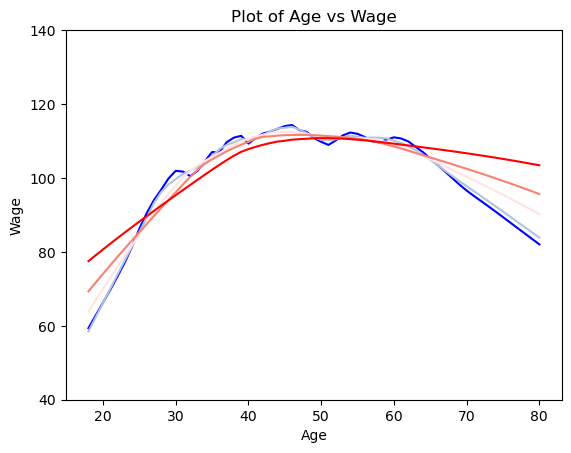

In [48]:
plt.scatter( age,y,s=10, color="white")

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Wage' )
plt.title('Plot of Age vs Wage')


# Add prediction line to plot

plt.plot(smoothed1.iloc[:,0], smoothed1.iloc[:,1],color = 'blue')
plt.plot(smoothed2.iloc[:,0], smoothed2.iloc[:,1],color='lightsteelblue')
plt.plot(smoothed.iloc[:,0], smoothed.iloc[:,1],color='mistyrose')
plt.plot(smoothed3.iloc[:,0], smoothed3.iloc[:,1],color='salmon')
plt.plot(smoothed4.iloc[:,0], smoothed4.iloc[:,1],color='red')


plt.ylim([40,140])
plt.show()

For the plot above the blues are smaller windows and the red are larger windows.  As the window size increases, the lines get smoother.

The blue lines seem to be bumpier than the pink/red lines.

Let's look at another dataset.  

In [49]:
penguins = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/penguins.csv", na_values=['NA'])
# remove rows with missing data
penguins.dropna(inplace=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Recall that before we fit a quadratic regression to this model and here is the predicted vs residual plot for that curve.

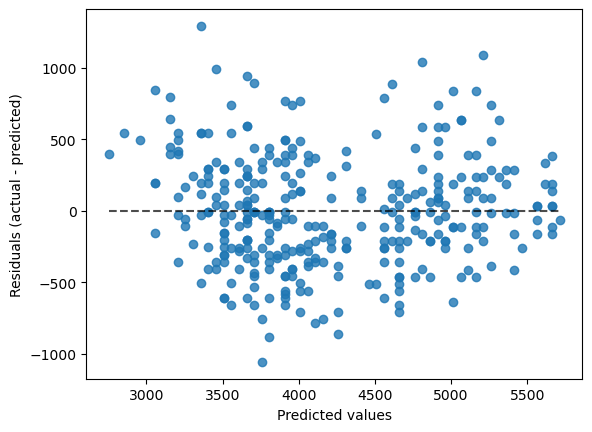

In [50]:

X = penguins['flipper_length_mm']  
y = penguins['body_mass_g']  
x2 = sm.add_constant(X)

#fit linear regression model
model_linear = sm.OLS(y, x2).fit()
y_hat_linear = model_linear.predict(x2)
# below makes a residual vs predicted values plot
display = PredictionErrorDisplay(y_true=y, y_pred=y_hat_linear)
display.plot()
plt.show()

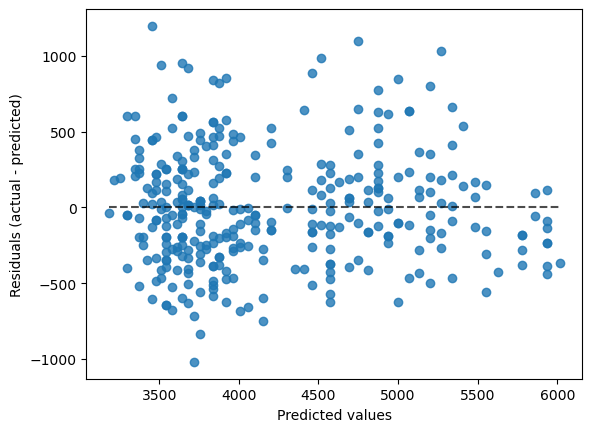

In [51]:
penguins['flipper_length_sq']= penguins['flipper_length_mm']*penguins['flipper_length_mm']
X = penguins[['flipper_length_mm', 'flipper_length_sq']]  
y = penguins['body_mass_g']  
x2 = sm.add_constant(X)

#fit linear regression model
model2 = sm.OLS(y, x2).fit()
y_hat_quad = model2.predict(x2)
# below makes a residual vs predicted values plot
display = PredictionErrorDisplay(y_true=y, y_pred=y_hat_quad)
display.plot()
plt.show()

So let's look at the local regression for these data.  

In [52]:
# define our predictor and response
X = penguins['flipper_length_mm'] 
y = penguins['body_mass_g']  
# fit lowess model to these data using 10% of the data for each local regression
smoothed_p= sm.nonparametric.lowess(exog=X, endog=y, frac=0.1)
# make smoothed_p a data frame
smoothed_p=pd.DataFrame(smoothed_p)
# not dropping duplicates here for reason of making a residual vs fitted plot.


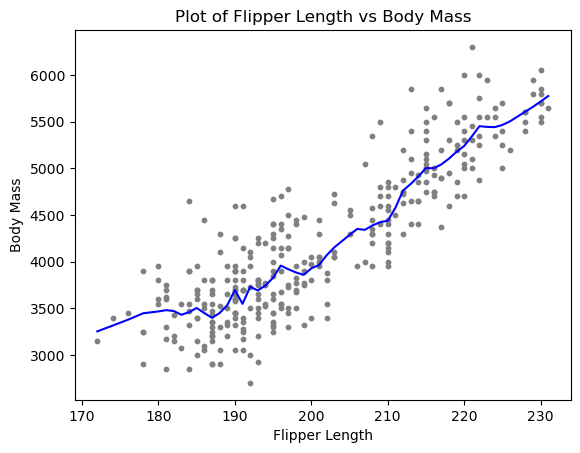

In [53]:
plt.scatter(X,y,s=10, color="grey")

# Add labels and title
plt.xlabel('Flipper Length')
plt.ylabel('Body Mass' )
plt.title('Plot of Flipper Length vs Body Mass')

# Add the local regression prediction line to plot

plt.plot(smoothed_p.iloc[:,0], smoothed_p.iloc[:,1],color = 'blue')

plt.show()

That line is too bumpy which is caused by using such a small fraction of the data.

In [54]:
# define our predictor and response
X = penguins['flipper_length_mm'] 
y = penguins['body_mass_g']  
# fit lowess model to these data
smoothed_p= sm.nonparametric.lowess(exog=X, endog=y, frac=0.5)
smoothed_p=pd.DataFrame(smoothed_p)

# not dropping duplicates here for reason of making a residual vs fitted plot.

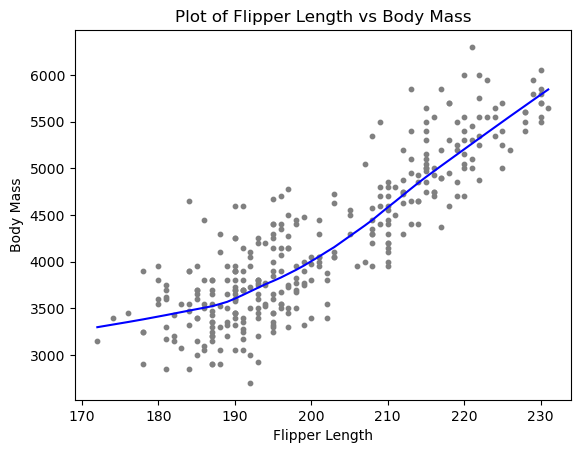

In [55]:
# make a plot of the local regression
plt.scatter(X,y,s=10, color="grey")

# Add labels and title
plt.xlabel('Flipper Length')
plt.ylabel('Body Mass' )
plt.title('Plot of Flipper Length vs Body Mass')

# Add prediction line to plot


plt.plot(smoothed_p.iloc[:,0], smoothed_p.iloc[:,1],color = 'blue')
plt.show()

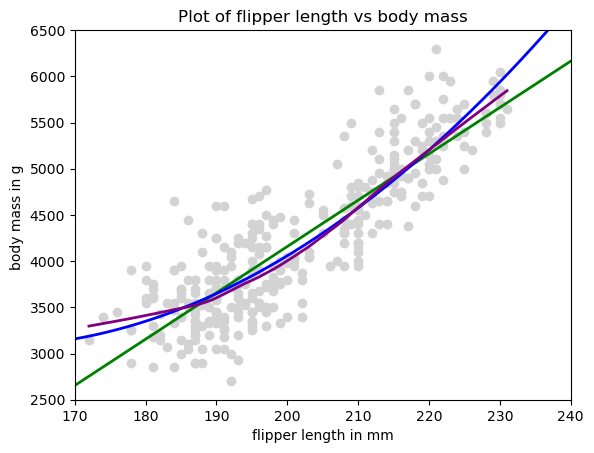

In [56]:
# create a plot with the quadratic and the linear models
plt.scatter( penguins['flipper_length_mm'],penguins['body_mass_g'], color="lightgrey")

# Add labels and title
plt.xlabel('flipper length in mm')
plt.ylabel('body mass in g ')
plt.title('Plot of flipper length vs body mass')
#create an array of value from 100 to 300
xseq = np.linspace(100, 300, num=5000)

# Add regression line to plot
plt.plot(xseq, -5872.0927 + 50.1533*xseq , color='green', linewidth=2)
plt.plot(xseq, 16585-171.6140*xseq + 0.5449*xseq*xseq,color="blue", linewidth=2)
plt.plot(smoothed_p.iloc[:,0], smoothed_p.iloc[:,1],color = 'purple', linewidth=2)
#print(-5872.0927 + 50.1533*xseq)

# Set the x-axis and the y-axis limits
plt.xlim(170, 240)
plt.ylim(2500,6500)
# Show plot
plt.show()


Seems like the smoothed and the quadratic are very similar.  Let's look at how they perform on RMSE.

In [57]:
# we need to create a function to the predicted values for each value of the 
# of the predictor.  To do that we build a interpolation function make
# predictions at the values in X, the flipper lengths
# 
interpolate_fctn = interp1d(smoothed_p.iloc[:, 0], smoothed_p.iloc[:, 1], fill_value="extrapolate")
# use the interpolate_fctn function to get predicted values for 
# the values in X
y_hat_smooth = interpolate_fctn(X)

In [58]:
# calculate and print the rmse for the linear model
rmse_linear = np.sqrt(sum((y-y_hat_linear)**2)/(len(y)-2))
print(rmse_linear)

# calculate and print the rmse for the quadratic model
rmse_quad = np.sqrt(sum((y-y_hat_quad)**2)/(len(y)-3))
print(rmse_quad)


# calculate and print the rmse for the loess model
rmse_smooth =np.sqrt(sum((y-y_hat_smooth)**2)/(len(y)-3))
print(rmse_smooth)


393.34326056700826
380.48181212261585
375.5401816193433


Hmm, so the smoother does a slightly better job than the quadratic or the linear model.  

Loess regression models aren't quite black box models because we can plot them and understand
what the function we are estimating looks like but they don't have parameters, like the
coefficients, in the linear or quadratic models that we can interpret.


Tasks

1. Read in National Football League historical draft data located at https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/NFLDraft.csv.  This is a cleaner version of the file we looked at last time.  In particular the variable
names have had the spaces removed from them.

2. Fit three different loess curves with frac's of 0.1, 0.2, 0.4 to predict 'G' from 'Pick'.

3. Compare those curves to a linear model and a quadratic model.

4. Plot the predicted functions for your models above.
    
5. Which model is best?  How do you know?

In [59]:
# read in the blue jay data
nfl = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/NFLDraft.csv")
# remove rows with missing data
#nfl.dropna(inplace=True)
nfl.head()
nfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2853 entries, 0 to 2852
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          2853 non-null   int64  
 1   Rnd           2853 non-null   int64  
 2   Pick          2853 non-null   int64  
 3   Tm            2853 non-null   object 
 4   Name          2852 non-null   object 
 5   Pos           2853 non-null   object 
 6   To            2356 non-null   float64
 7   AP1           2853 non-null   int64  
 8   PB            2853 non-null   int64  
 9   GS            277 non-null    float64
 10  St            2853 non-null   int64  
 11  CarAV         2356 non-null   float64
 12  G             2356 non-null   float64
 13  College/Univ  2844 non-null   object 
 14  TradPower     2853 non-null   int64  
dtypes: float64(4), int64(7), object(4)
memory usage: 334.5+ KB


In [60]:
# the code below fills in missing values with zeros for each features/columns.
# we do this since if a player did not have a value we assume they 
# never played in a game, 'G  '
# or never started a game 'GS'
# or never had any career approximate value 'CarAV  '
nfl['G']=nfl['G'].fillna(0)
nfl['GS']=nfl['GS'].fillna(0)
nfl['CarAV']=nfl['CarAV'].fillna(0)

In [ ]:

# define our predictor and response
X = nfl['Pick'] 
y = nfl['G']  
# fit lowess model to these data using 10% of the data for each local regression
smoothed1= sm.nonparametric.lowess(exog=X, endog=y, frac=0.1)
smoothed2= sm.nonparametric.lowess(exog=X, endog=y, frac=0.2)
smoothed3= sm.nonparametric.lowess(exog=X, endog=y, frac=0.4)
# make smoothed_p a data frame
smoothed1=pd.DataFrame(smoothed1)
smoothed2=pd.DataFrame(smoothed2)
smoothed3=pd.DataFrame(smoothed3)
# not dropping duplicates here for reason of making a residual vs fitted plot.



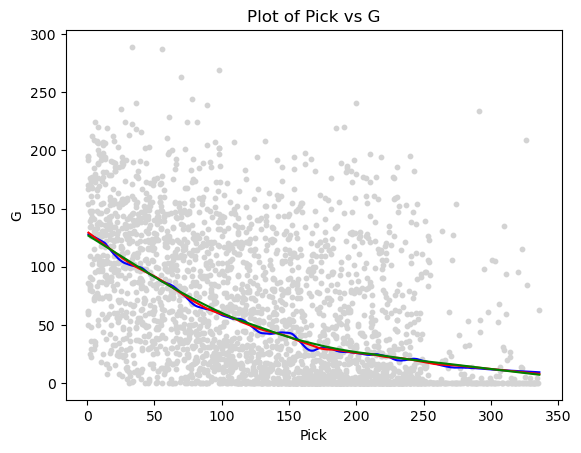

In [62]:
# create a plot with the quadratic and the linear models with dot size 10 and color  light grey

plt.scatter( nfl['Pick'],nfl['G'],s=10, color="lightgrey")

# Add labels and title
plt.xlabel('Pick')
plt.ylabel('G' )
plt.title('Plot of Pick vs G')

# Add prediction line to plot

plt.plot(smoothed1.iloc[:,0], smoothed1.iloc[:,1],color = 'blue')
plt.plot(smoothed2.iloc[:,0], smoothed2.iloc[:,1],color='red')
plt.plot(smoothed3.iloc[:,0], smoothed3.iloc[:,1],color='green')


plt.show()

In [ ]:
# calculate and print the rmse for the linear model
rmse_linear2 = np.sqrt(sum((y-y_hat_linear)**2)/(len(y)-2))
print(rmse_linear2)

# calculate and print the rmse for the quadratic model
rmse_quad2 = np.sqrt(sum((y-y_hat_quad2)**2)/(len(y)-3))
print(rmse_quad2)


# calculate and print the rmse for the loess model  
rmse_smooth =np.sqrt(sum((y-y_hat_smooth2)**2)/(len(y)-3))
print(rmse_smooth)

NameError: name 'y_hat_linear2' is not defined